https://www.datacamp.com/tutorial/decision-tree-classification-python

In [41]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
dataset = pd.read_csv("../Datasets/diabetes.csv")

In [5]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
target = dataset['Outcome']
features = dataset.drop('Outcome' , axis = 1)

In [37]:
X_train ,  X_test , y_train ,  y_test = train_test_split(features , target , shuffle = True , train_size = 0.7 , random_state = 1)

In [38]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 537, dtype: int64

In [44]:
classifier = DecisionTreeClassifier(criterion= 'entropy' , max_depth= 3)

classifier.fit(X_train , y_train)

y_pred = classifier.predict(X_test)

In [45]:
accuracy = metrics.accuracy_score(y_test , y_pred)
accuracy

0.7705627705627706

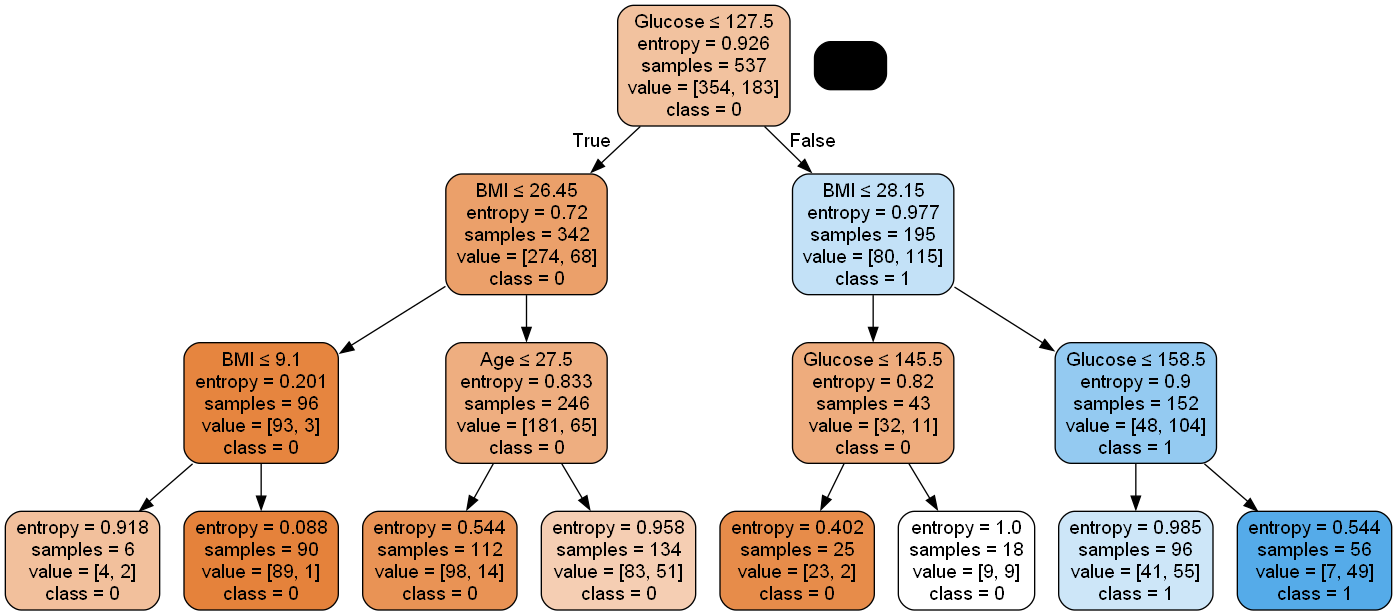

In [46]:
feature_cols = ['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness'	,'Insulin'	,'BMI',	'DiabetesPedigreeFunction'	
                        ,'Age']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decisiontreediabetes.png')
Image(graph.create_png())

LazyPredict to get best algorithm for best performance

In [34]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0 , ignore_warnings=True , custom_metric=None)
models , pred = clf.fit(X_train , X_test , y_train , y_test)

In [36]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.81               0.78     0.78      0.81   
NearestCentroid                    0.78               0.78     0.78      0.78   
KNeighborsClassifier               0.79               0.76     0.76      0.79   
BaggingClassifier                  0.80               0.76     0.76      0.79   
ExtraTreesClassifier               0.78               0.75     0.75      0.78   
GaussianNB                         0.78               0.75     0.75      0.78   
SVC                                0.79               0.75     0.75      0.78   
BernoulliNB                        0.76               0.75     0.75      0.76   
AdaBoostClassifier                 0.78               0.74     0.74      0.78   
LGBMClassifier                     0.78               0.74     0.74      0.77   
LinearSVC                   